## Linear Regression

### Profit  prediction

In [1]:
# importing libraries for linear regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# importing data set and extracting into dependent & independent
df = pd.read_csv('profit_prediction.csv')
X = df.iloc[:, :-1].values
Y = df.iloc[:, 4].values

In [3]:
# head function shows 1st 5 values
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [4]:
# checking if data frame has null value 
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

In [5]:
# data types
df.dtypes

Marketing Spend    float64
Administration     float64
Transport          float64
Area                object
Profit             float64
dtype: object

In [6]:
# shape of data frame
df.shape

(50, 5)

In [7]:
# Encoding data
from sklearn.preprocessing import LabelEncoder        # change string which are same give it to same value
labelencoder = LabelEncoder()
df["Area"] = labelencoder.fit_transform(df['Area'])

In [8]:
# another method to encoding to get dummy value for that
#df.Area.unique()
#df.Area = pd.get_dummies(df.Area, drop_first=True)             # it give 0 value to the entier columns

In [9]:
# droping the null value
# df.dropna()

In [10]:
# feature scaling the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Marketing Spend']] = scaler.fit_transform(df[['Marketing Spend']])
df[['Administration']] = scaler.fit_transform(df[['Administration']])
df[['Transport']] = scaler.fit_transform(df[['Transport']])
df[['Profit']] = scaler.fit_transform(df[['Profit']])

In [11]:
X = df.drop(['Profit'],axis='columns')
y = df.Profit

<AxesSubplot:>

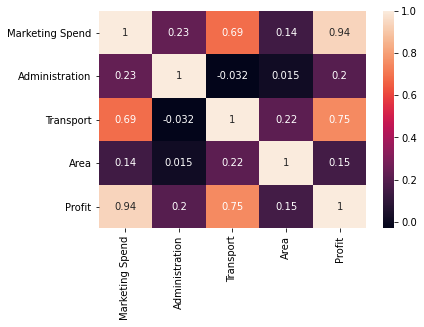

In [12]:
# data visualisation
# building correlation matrix
sns.heatmap(df.corr(), annot=True)

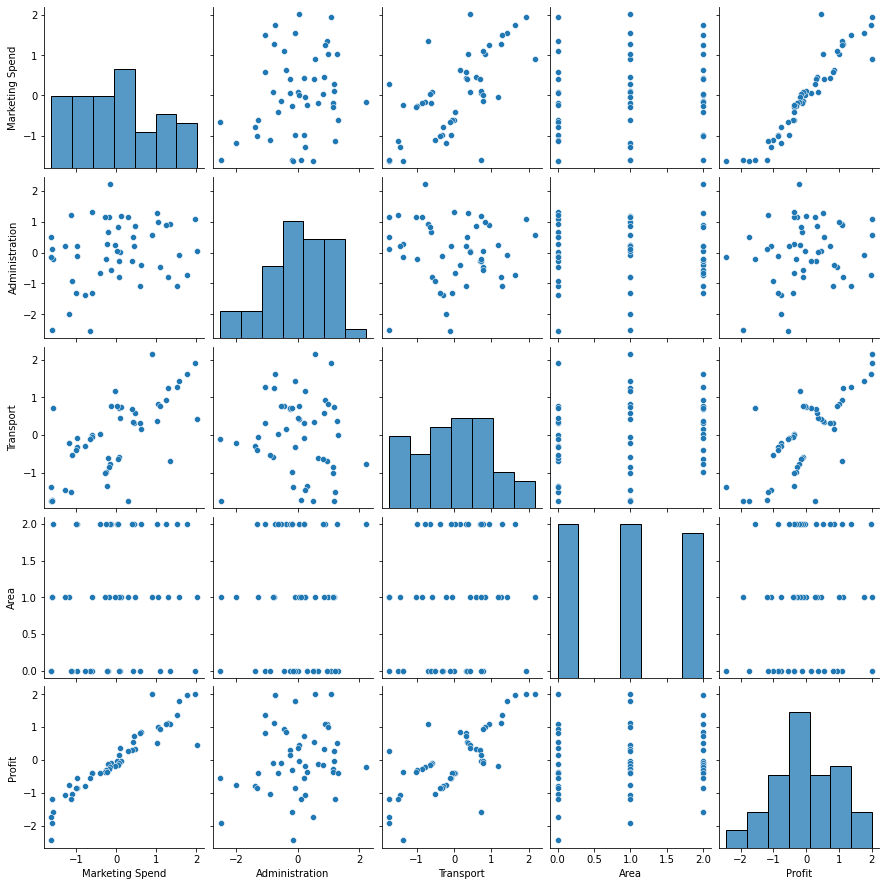

In [13]:
sns.pairplot(df)

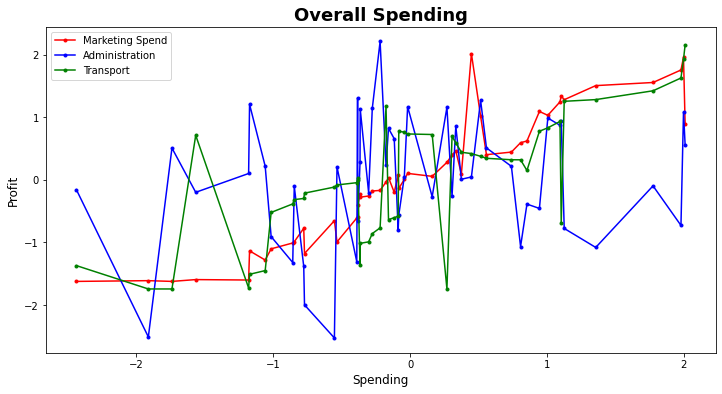

In [14]:
# figure func used to resize the entire plotting graph
plt.figure(figsize=(12,6))

# title for graphing plot
# fontdict to change font size and weight of it
plt.title('Overall Spending',fontdict={'fontweight':'bold', 'fontsize': '18'})

plt.plot(df.Profit, df['Marketing Spend'], 'r.-', label='Marketing Spend')
plt.plot(df.Profit, df['Administration'], 'b.-', label='Administration')
plt.plot(df.Profit, df['Transport'], 'g.-', label='Transport')
plt.xlabel('Spending',fontdict={'fontsize': '12'})
plt.ylabel('Profit',fontdict={'fontsize': '12'})
plt.legend()
plt.show()

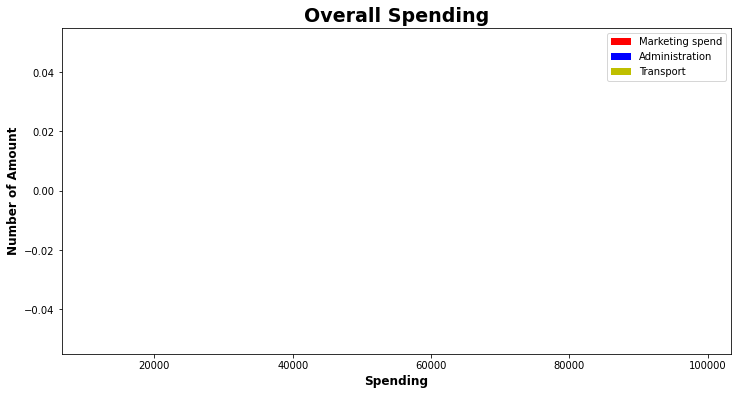

In [15]:
plt.figure(figsize=(12,6))
data=[df['Marketing Spend'], df.Administration, df.Transport]
plt.hist(data, bins=[10000,20000,30000,40000,50000,60000,70000,80000,90000,100000], color=['r', 'b', 'y'], histtype='bar', label=['Marketing spend', 'Administration', 'Transport'])
plt.title('Overall Spending', fontdict={'fontweight':'bold', 'fontsize':'19'})
plt.xlabel('Spending', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.ylabel('Number of Amount', fontdict={'fontweight':'bold', 'fontsize':'12'})
plt.legend()
plt.show()

In [16]:
# data modelling
# this data set is suitable linear regression model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression = regression.fit(X, y)       # fit method is used to assign the data to model

In [17]:
reg_pred = regression.predict(X)

In [18]:
print(reg_pred)

[ 1.17296347  1.98368089  1.6974021   1.52264647  1.41938252  1.25300443
  0.94838754  1.19081994  1.01246255  1.02235024  0.50194136  0.51756793
  0.41294782  0.41176673  0.90477697  1.68180189  0.17605046  0.50894385
  0.44179942 -0.11350668  0.19750406  0.26360993  0.15542584  0.02992418
 -0.08406195 -0.25738781 -0.09347112  0.22269976 -0.24686936 -0.29127428
 -0.42545569 -0.40189718 -0.44703535 -0.3372164  -0.432393   -0.52480899
 -0.80504071 -0.59472725 -1.02561481 -0.6994473  -0.84110419 -0.92046646
 -0.99326426 -1.30941569 -1.17114025 -1.62257682 -1.12551972 -1.62341138
 -1.70026431 -1.56248937]


In [19]:
# finding the accuracy of our trained model
regression.score(X,y)

0.901100838096544

In [20]:
# adding these two columns to our dataset
df['LRegression'] = reg_pred

In [21]:
# inversing to previous values
df["Area"] = labelencoder.inverse_transform(df['Area'])
df[['Marketing Spend']] = scaler.inverse_transform(df[['Marketing Spend']])
df[['Administration']] = scaler.inverse_transform(df[['Administration']])
df[['Transport']] = scaler.inverse_transform(df[['Transport']])
df[['Profit']] = scaler.inverse_transform(df[['Profit']])
df[['LRegression']] = scaler.inverse_transform(df[['LRegression']])

In [22]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit,LRegression
0,147840.345079,134387.287682,197957.300760,Dhaka,192261.83,158815.151566
1,190053.584462,155217.794346,188766.377893,Ctg,191792.06,191163.654675
2,182013.651926,82954.395226,176912.854437,Rangpur,191050.39,179740.820975
3,174050.191998,108167.586090,168760.367619,Dhaka,182901.99,172767.882271
4,172061.263198,68922.687634,163146.982433,Rangpur,166187.94,168647.538704
